In [2]:
import networkx as nx
import numpy as np
import itertools 

#function to compute k-path transformed laplacian based on the laplace 
#transform with lambda parameter

def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [3]:

#function to compute k-path transformed laplacian based on the mellin
#transform with s parameter

def kplaplacian_mtf(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -(1/pow(k,s))
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

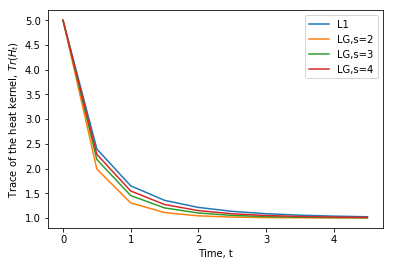

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])

#compute eigenvalues for the different s values for the mellin transform
l1 = eigvalsh(nx.laplacian_matrix(G).todense()) #eigenvalues with no Mellin
l2 = eigvalsh(kplaplacian_mtf(G,2))             #eigenvalues with s=2
l3 = eigvalsh(kplaplacian_mtf(G,3))             #eigenvalues with s=3
l4 = eigvalsh(kplaplacian_mtf(G,4))             #eigenvalues with s=4
l5 = eigvalsh(kplaplacian_mtf(G,5))             #eigenvalues with s=5

#set the time range
time = np.arange(0,5,0.5)

T1 =[]
T2 =[]
T3 =[]
T4 =[]
TT =[]

#compute the trace for the different matrices at different times, t
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    T4.append(np.sum(np.exp(-t*(l4))))

#plots
plt.plot(time,T1, label='L1')
plt.plot(time,T2, label='LG,s=2')
plt.plot(time,T3, label='LG,s=3')
plt.plot(time,T4, label='LG,s=4')

plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

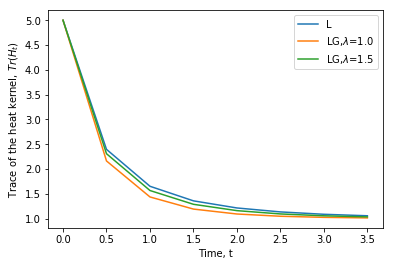

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])

#compute eigenvalues for the different lambda values for laplace transforms
l1 = eigvalsh(nx.laplacian_matrix(G).todense())
l2 = eigvalsh(kplaplacian_ltf(G,1))
l3 = eigvalsh(kplaplacian_ltf(G,1.5))

#set the time range
time = np.arange(0,4,0.5)

T1 =[]
T2 =[]
T3 =[]
TT =[]

#compute the trace for the different matrices at different times, t
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

#plots
plt.plot(time,T1, label='L')
plt.plot(time,T2, label='LG,$\lambda$=1.0')
plt.plot(time,T3, label='LG,$\lambda$=1.5')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


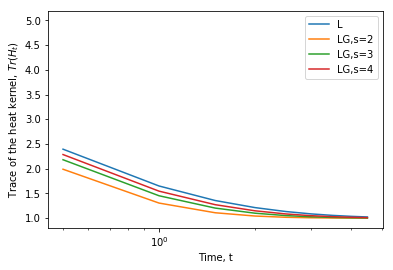

In [46]:
plt.semilogx(time,T1, label='L')
plt.semilogx(time,T2, label='LG,s=2')
plt.semilogx(time,T3, label='LG,s=3')
plt.semilogx(time,T4, label='LG,s=4')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


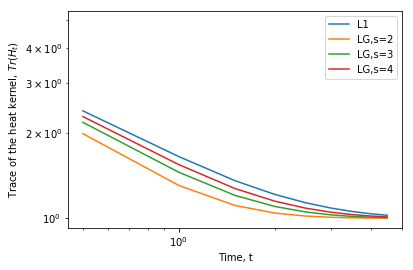

In [37]:
plt.loglog(time,T1, label='L1')
plt.loglog(time,T2, label='LG,s=2')
plt.loglog(time,T3, label='LG,s=3')
plt.loglog(time,T4, label='LG,s=4')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


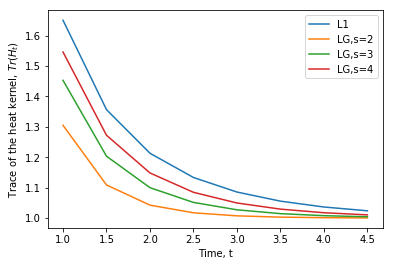

In [38]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])


l1 = eigvals(nx.laplacian_matrix(G).todense())
l2 = eigvals(kplaplacian_mtf(G,2))
l3 = eigvals(kplaplacian_mtf(G,3))
l4 = eigvals(kplaplacian_mtf(G,4))
l5 = eigvals(kplaplacian_mtf(G,5))

time = np.arange(1,5,0.5)

T1=[]
T2=[]
T3 = []
T4 =[]
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    T4.append(np.sum(np.exp(-t*(l4))))

plt.plot(time,T1, label='L1')
plt.plot(time,T2, label='LG,s=2')
plt.plot(time,T3, label='LG,s=3')
plt.plot(time,T4, label='LG,s=4')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


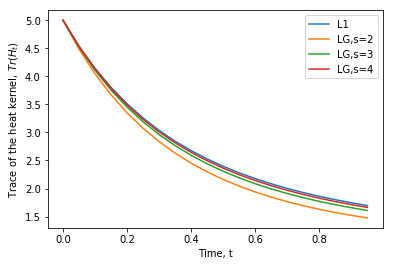

In [39]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])


l1 = eigvals(nx.laplacian_matrix(G).todense())
l2 = eigvals(kplaplacian_ltf(G,1))
l3 = eigvals(kplaplacian_ltf(G,1.5))
l4 = eigvals(kplaplacian_ltf(G,2))
l5 = eigvals(kplaplacian_ltf(G,2.5))

time = np.arange(0,1,0.05)

T1=[]
T2=[]
T3 = []
T4 =[]
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    T4.append(np.sum(np.exp(-t*(l4))))

plt.plot(time,T1, label='L1')
plt.plot(time,T2, label='LG,s=2')
plt.plot(time,T3, label='LG,s=3')
plt.plot(time,T4, label='LG,s=4')

plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


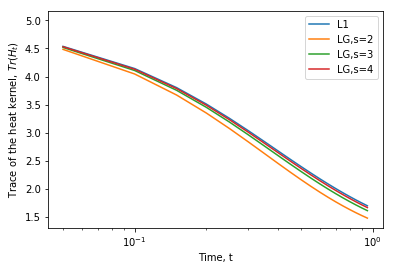

In [40]:
plt.semilogx(time,T1, label='L1')
plt.semilogx(time,T2, label='LG,s=2')
plt.semilogx(time,T3, label='LG,s=3')
plt.semilogx(time,T4, label='LG,s=4')

plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()